# Diamond price prediction

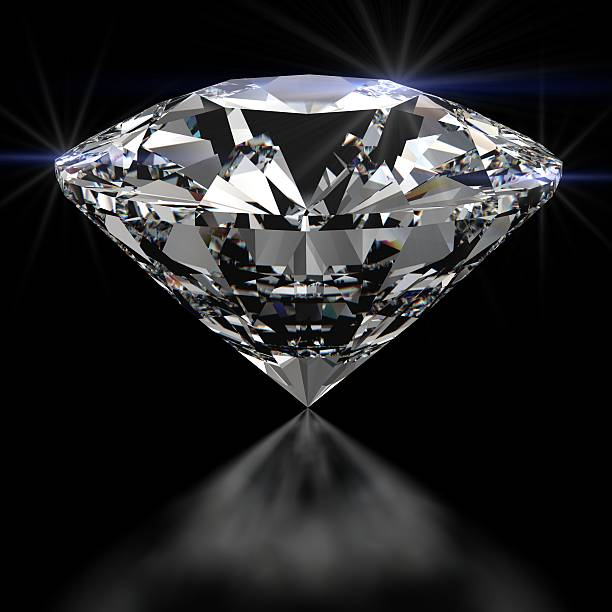

Business Scenario: A diamond merchant has come to you for help. They want to create an automated system to predict the apt price of a diamond based on its shape/size/color etc.

They have shared the shape/size/color data of 53940 diamonds.

Your task is to create a machine learning model which can predict the price of a diamond based on its characteristics.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:

Reading the data in python
Defining the problem statement
Identifying the Target variable
Looking at the distribution of Target variable
Basic Data exploration
Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
Feature Selection based on data distribution
Outlier treatment
Missing Values treatment
Visual correlation analysis
Statistical correlation analysis (Feature Selection)
Converting data to numeric for ML
Sampling and K-fold cross validation
Trying multiple Regression algorithms
Selecting the best Model
Deploying the best model in production
I know its a long list!! Take a deep breath... and let us get started!

### Reading the data into python

This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "DiamondpricesData.csv". This file contains 53940 diamond details.

### Data description

The business meaning of each column in the data is as below

price: The price of the Diamond
carat: The carat value of the Diamond
cut: The cut type of the Diamond, it determines the shine
color: The color value of the Diamond
clarity: The carat type of the Diamond
depth: The depth value of the Diamond
table: Flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above.
x: Width of the diamond
y: Length of the diamond
z: Height of the diamond

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

In [3]:
DiamondpricesData=pd.read_csv("C:/Users/Admin/miniconda3/machine learning/diamonds.csv", encoding='latin')
print('Shape before deleting duplicate values:', DiamondpricesData.shape)


Shape before deleting duplicate values: (53940, 11)


In [4]:
DiamondpricesData=DiamondpricesData.drop_duplicates()
print('Shape After deleting duplicate values:', DiamondpricesData.shape)


Shape After deleting duplicate values: (53940, 11)


In [5]:
DiamondpricesData.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Defining the problem statement:

Create a ML model which can predict the price of a diamond
Target Variable: price
Predictors: color, cut, carat etc.

### Determining the type of Machine Learning


Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

### Looking at the distribution of Target variable


If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

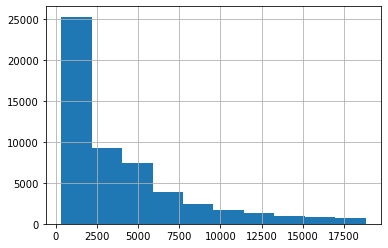

In [6]:
%matplotlib inline
DiamondpricesData['price'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from. It is slightly positively skewed. which is acceptable.

### Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the price of the diamond? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

head() : This helps to see a few sample rows of the data
info() : This provides the summarized information of the data
describe() : This provides the descriptive statistical details of the data
nunique(): This helps us to identify if a column is categorical or continuous

In [7]:
DiamondpricesData.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
DiamondpricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [9]:
DiamondpricesData.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [10]:
DiamondpricesData.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

### Basic Data Exploration Results

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

price: Continuous. Selected. This is the Target Variable!
carat: Continuous. Selected.
cut: Categorical. Selected.
color: Categorical. Selected.
clarity: Categorical. Selected.
depth: Continuous. Selected.
table: Continuous. Selected.
x: Continuous. Selected.
y: Continuous. Selected.
z: Continuous. Selected.

### Visual Exploratory Data Analysis

Categorical variables: Bar plot
Continuous variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted three categorical predictors in the data

Categorical Predictors: 'cut', 'color', 'clarity'

We use bar charts to see how the data is distributed for these categorical columns.

In [11]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [13]:
PlotBarCharts(inpData=DiamondpricesData, colsToPlot=['cut', 'color', 'clarity'])

### Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

If the bars are too skewed, like there is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

Selected Categorical Variables: In this data, all three categorical variables are selected for further analysis.

'cut', 'color', 'clarity'

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

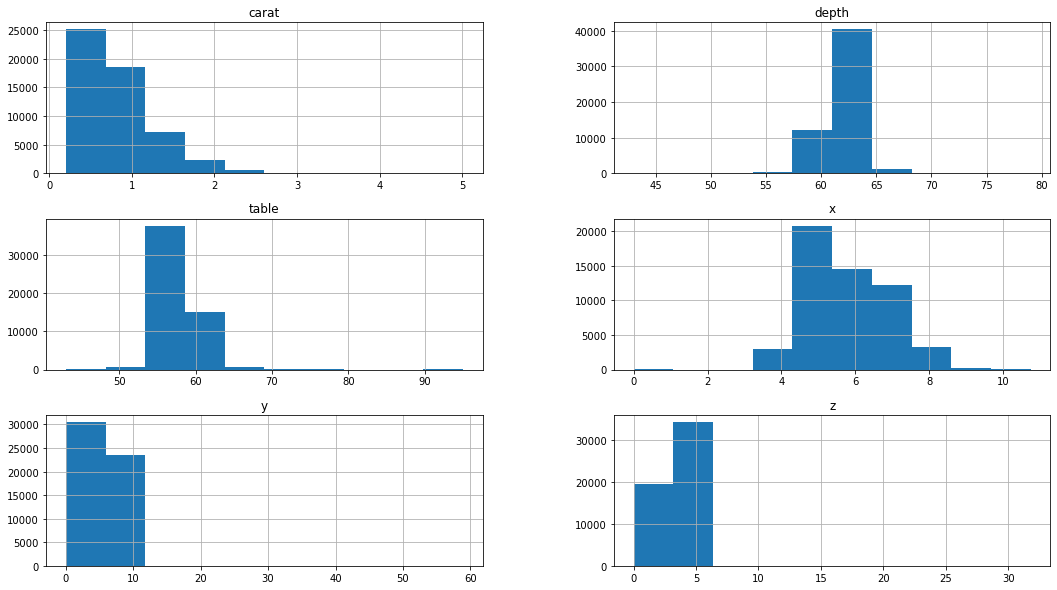

In [14]:
DiamondpricesData.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

### Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "carat", there are around 25000 rows in data that has a value between 0 to 0.5.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

carat : Selected. The distribution is good.
table: Selected. The distribution is good.
depth: Selected. The distribution is good.
x: Selected. Outliers seen near 0, need to treat them.
y: Selected. Outliers seen beyond 20, need to treat them.
z: Selected. Outliers seen beyond 10, need to treat them.

### Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

#### Replacing outliers for 'x'

In [15]:
DiamondpricesData['x'][DiamondpricesData['x']>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53932, dtype: float64

The above result shows that the nearest logical value is 3.73, hence replacing any values less than that with it.

In [16]:
DiamondpricesData['x'][DiamondpricesData['x']<3.73] =3.73

#### Replacing outliers for 'y'

In [17]:
DiamondpricesData['y'][DiamondpricesData['y']<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
15951     0.00
24520     0.00
49556     0.00
49557     0.00
27429     0.00
Name: y, Length: 53938, dtype: float64

Above result shows the nearest logical value is 10.54, hence, replacing any value above 20 with it.

In [18]:
DiamondpricesData['y'][DiamondpricesData['y']>20] =10.54

#### Replacing outliers for 'z'

In [19]:
DiamondpricesData['z'][DiamondpricesData['z']<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
5471     0.00
24394    0.00
13601    0.00
2314     0.00
49557    0.00
Name: z, Length: 53939, dtype: float64

Above result shows the nearest logical value is 6.98, hence, replacing any value above 8 with it.

In [20]:
DiamondpricesData['z'][DiamondpricesData['z']>8] =6.98

### Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

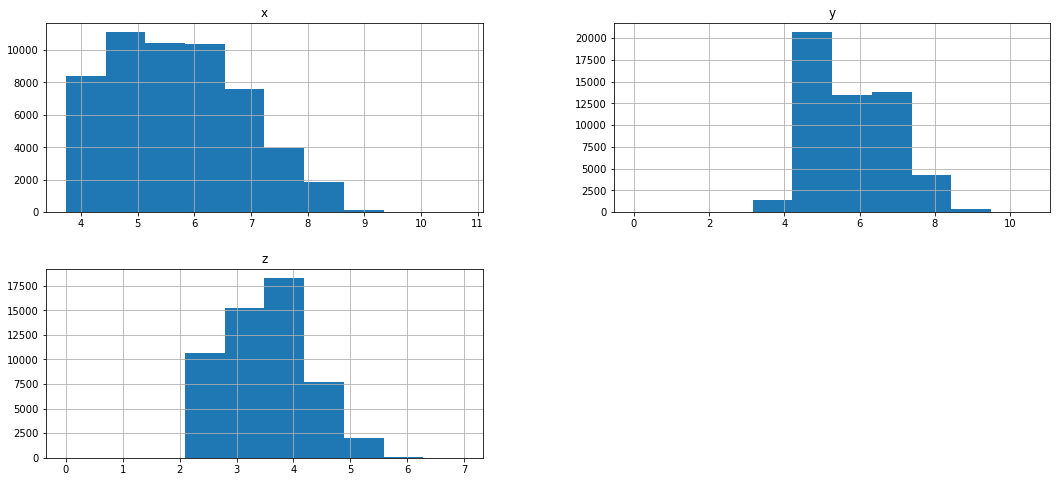

In [21]:
DiamondpricesData.hist(['x','y', 'z'], figsize=(18,8))

Outliers seen on the left hand side near zero! Need to treat them as well.

#### Replacing outliers for 'y' on the left side

In [22]:
DiamondpricesData['y'][DiamondpricesData['y']>2].sort_values(ascending=True)

31600     3.68
31596     3.71
31598     3.71
31601     3.72
31599     3.73
         ...  
25998    10.10
27630    10.16
24067    10.54
49189    10.54
27415    10.54
Name: y, Length: 53933, dtype: float64

Above result shows the nearest logical value is 3.68, hence, replacing any value below 2 with it.

In [23]:
DiamondpricesData['y'][DiamondpricesData['y']<2] =3.68

#### Replacing outliers for 'z' on the left side

In [24]:
DiamondpricesData['z'][DiamondpricesData['z']>2].sort_values(ascending=True)

39246    2.06
31592    2.24
47138    2.25
31591    2.26
14       2.27
         ... 
27130    6.43
27630    6.72
24067    6.98
48410    6.98
27415    6.98
Name: z, Length: 53917, dtype: float64

Above result shows the nearest logical value is 2.06, hence, replacing any value below 2 with it.

In [25]:
DiamondpricesData['z'][DiamondpricesData['z']<2] =2.06

### Visualizing distribution again after outlier treatment

The distribution has improved after the outlier treatment. The outliers on the left side are treated.

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

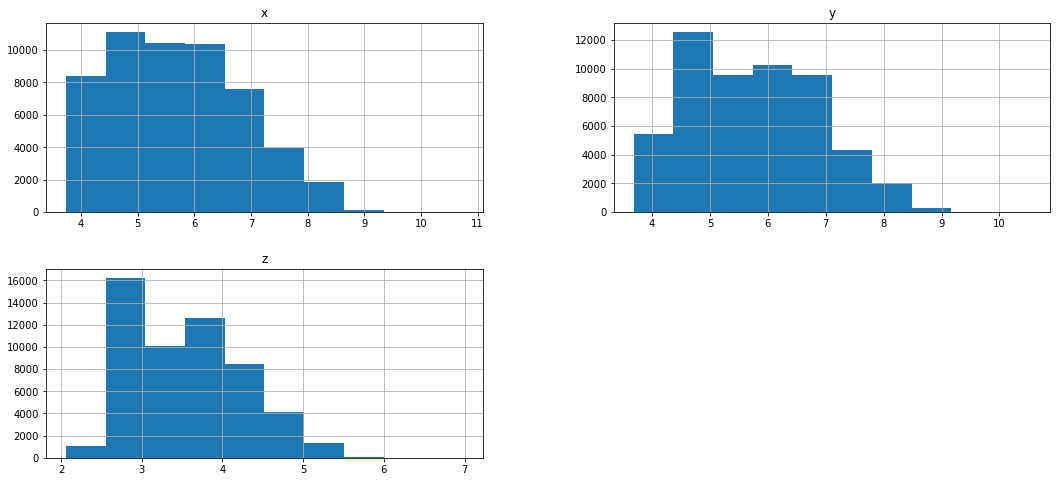

In [26]:
DiamondpricesData.hist(['x','y', 'z'], figsize=(18,8))

### Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records
Impute the missing values with MEDIAN value for continuous variables
Impute the missing values with MODE value for categorical variables
Interpolate the values based on nearby values
Interpolate the values based on business logic

In [27]:
DiamondpricesData.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

#### Visual exploration of relationship between variables

Continuous Vs Continuous ---- Scatter Plot
Categorical Vs Continuous---- Box Plot
Categorical Vs Categorical---- Grouped Bar Plots

#### Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix
Categorical Vs Continuous---- ANOVA test
Categorical Vs Categorical--- Chi-Square tes

In this case study the Target variable is Continuous, hence below two scenarios will be present

Continuous Target Variable Vs Continuous Predictor
Continuous Target Variable Vs Categorical Predictor

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

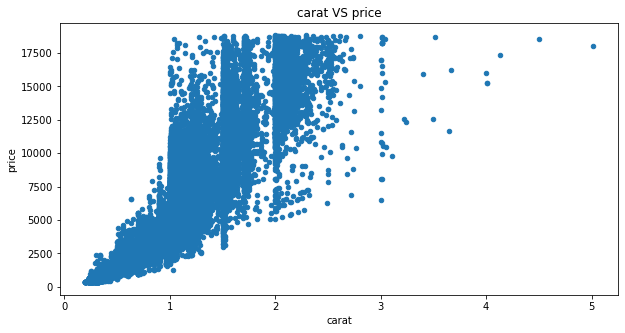

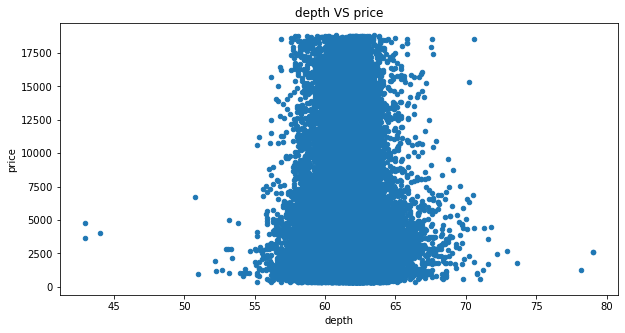

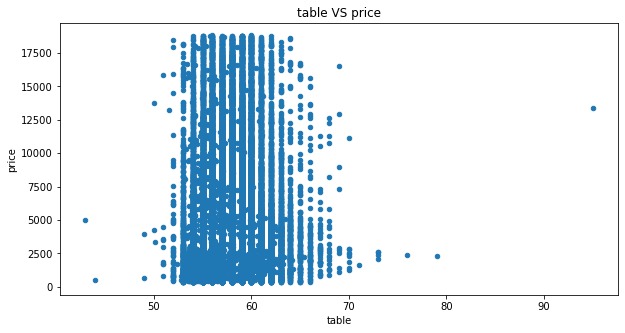

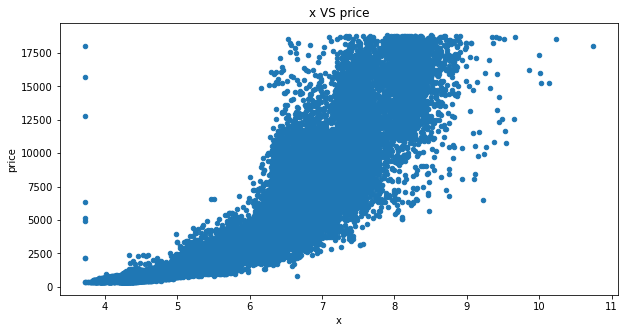

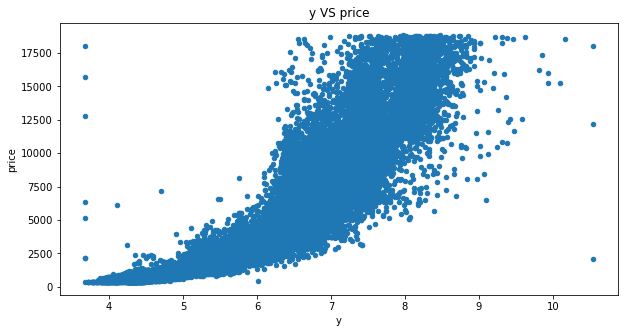

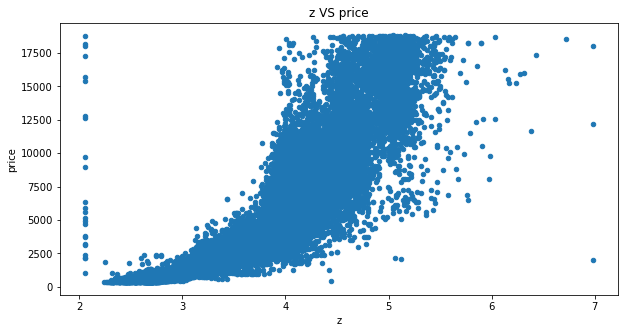

In [28]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

for predictor in ContinuousCols:
    DiamondpricesData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

### Scatter charts interpretation

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

1.Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2.Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3.No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value

### Outliers seen in the scatter charts

In the above scatter charts you can observe some of the points in x, y and z columns, which are in the lower range. There is a straight line on the left side.

These points will interfere with the model fit.

Hence they must be removed from the data.

In [29]:
DataFilter=(DiamondpricesData['z']>2.06) & (DiamondpricesData['z']<6.5)
DiamondpricesData=DiamondpricesData[DataFilter]

### Looking at the scatter charts again after outlier removal

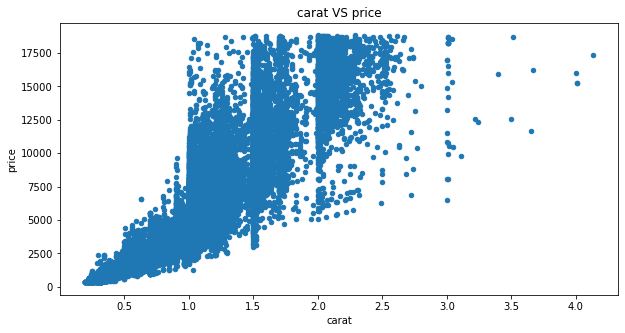

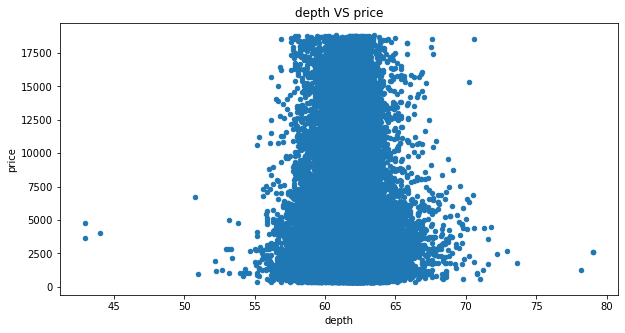

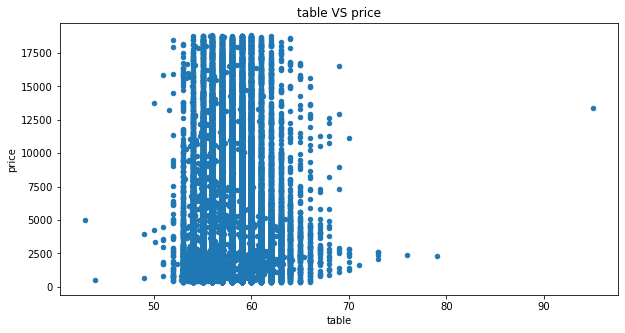

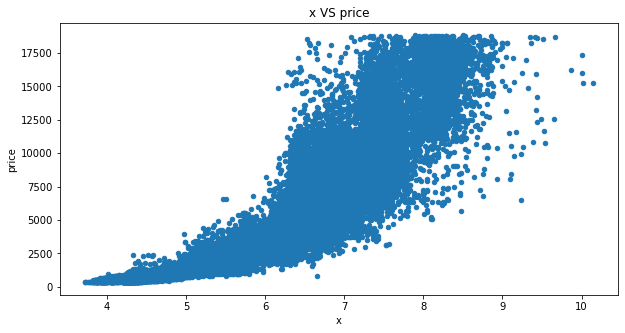

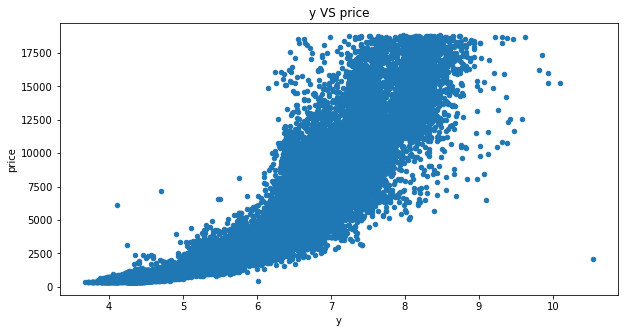

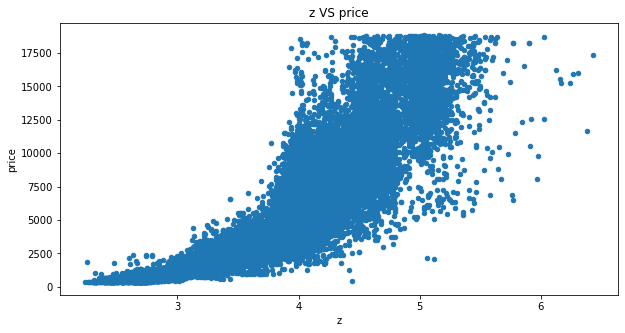

In [30]:
ContinuousCols=['carat', 'depth', 'table', 'x','y','z']

for predictor in ContinuousCols:
    DiamondpricesData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor+" VS "+ 'price')

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as the covariance between two features  x  and  y  (numerator) divided by the product of their standard deviations (denominator):

1.This value can be calculated only between two numeric columns
2.Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
3.Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
4.Correlation near {0} means No relationship, the scatter plot will show no clear trend.
5.If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
6.We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [31]:
ContinuousCols=['price','carat', 'depth', 'table', 'x','y','z']

CorrelationData=DiamondpricesData[ContinuousCols].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921887,-0.011004,0.127275,0.887157,0.888561,0.882473
carat,0.921887,1.000000,0.027569,0.181810,0.978055,0.976929,0.977127
depth,-0.011004,0.027569,1.000000,-0.295873,-0.025364,-0.028484,0.096229
table,0.127275,0.181810,-0.295873,1.000000,0.196165,0.189877,0.155726
x,0.887157,0.978055,-0.025364,0.196165,1.000000,0.998439,0.991559
y,0.888561,0.976929,-0.028484,0.189877,0.998439,1.000000,0.991253
z,0.882473,0.977127,0.096229,0.155726,0.991559,0.991253,1.000000


In [32]:
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

price    1.000000
carat    0.921887
x        0.887157
y        0.888561
z        0.882473
Name: price, dtype: float64

#### Final selected Continuous columns:

'carat', 'x','y','z'

### Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

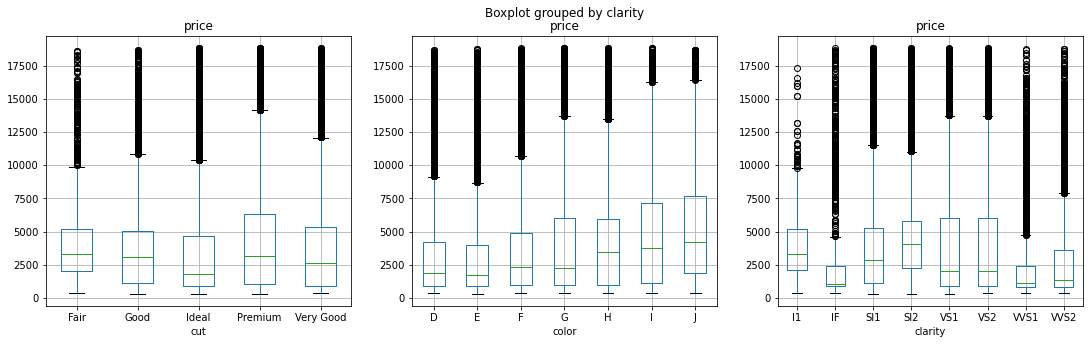

In [33]:
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    DiamondpricesData.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Box-Plots interpretation

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with price.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

#### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

1.Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
2.ANOVA Test result: Probability of H0 being true

In [34]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [35]:
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData=DiamondpricesData, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 1.1724065351734302e-148
color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 3.09531994e-316


['cut', 'color', 'clarity']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

#### Final selected Categorical columns:

'cut', 'color', 'clarity'

### Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [36]:
SelectedColumns=['carat', 'x','y','z','cut', 'color', 'clarity']

DataForML=DiamondpricesData[SelectedColumns]
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [37]:
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

1.Converting each Ordinal Categorical columns to numeric
2.Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3.Converting all other nominal categorical columns to numeric using pd.get_dummies()
4.Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

#### Converting the ordinal variable to numeric using mapping

In [38]:
DataForML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [39]:
DataForML['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [40]:
DataForML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [41]:
DataForML['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [42]:
DataForML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [43]:
DataForML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

### Converting the nominal variable to numeric using get_dummies()

In [44]:
DataForML_Numeric=pd.get_dummies(DataForML)

DataForML_Numeric['price']=DiamondpricesData['price']

DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


### Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [45]:
DataForML_Numeric.columns

Index(['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [46]:
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37738, 7)
(37738,)
(16174, 7)
(16174,)


### Multiple Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

print(RegModel)

LinearRegression()


In [50]:
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

In [51]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n Model Validation and Accuracy Calculations')

R2 Value: 0.8957058449184613

 Model Validation and Accuracy Calculations


In [52]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

In [53]:
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   price  Predictedprice
0    552             4.0
1   3405          3590.0
2   6288          6185.0
3  14465         10404.0
4    505           427.0


In [54]:
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 59.030294233425764
Median Accuracy on test data: 77.05882914152346


In [55]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

In [58]:
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [61.45927451 69.61348617 78.84784973 75.8646412  75.41339837 16.77003452
 29.75636244 41.38598748 55.87339271 65.06785461]

Final Average Accuracy of the model: 57.01


### SVM

In [60]:
import sklearn
from sklearn import svm, preprocessing 

In [61]:
DataForML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,4,6,3
1,0.21,3.89,3.84,2.31,5,6,2
2,0.23,4.05,4.07,2.31,1,6,4
3,0.29,4.20,4.23,2.63,5,2,5
4,0.31,4.34,4.35,2.75,1,1,3


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
from sklearn.svm import SVR

In [64]:
svr = SVR(kernel = 'linear',C = 1000)

In [65]:
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.8812487854933577

In [68]:
from sklearn.preprocessing import StandardScaler as sc
sc = StandardScaler()

In [72]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_test_std)

[[ 2.18475649e-01  4.47575316e-01  4.67291531e-01 ... -1.89253402e+00
  -1.41526526e+00  5.15015099e-01]
 [-1.83583466e-01 -3.56796344e-02 -1.46791181e-03 ...  3.73494420e-01
  -2.40670805e-01 -4.93163595e-02]
 [ 5.57051746e-01  7.33948621e-01  7.10685858e-01 ...  1.12883723e+00
   1.52122087e+00 -6.13647818e-01]
 ...
 [-1.05118471e+00 -1.34225783e+00 -1.31760019e+00 ...  1.12883723e+00
   1.52122087e+00 -1.17797928e+00]
 [-1.11466773e+00 -1.44069866e+00 -1.42577545e+00 ... -1.13719121e+00
   9.33923645e-01 -4.93163595e-02]
 [-1.03002371e+00 -1.11852869e+00 -1.18238112e+00 ...  1.12883723e+00
   9.33923645e-01 -1.17797928e+00]]


In [73]:
sc= StandardScaler().fit(X_train)

In [74]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

In [75]:
y_test_pred

array([4088.30543268, 2624.18194749, 5765.74151105, ...,  662.85175647,
        506.29253391,  367.37740156])

In [76]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8772944888296335

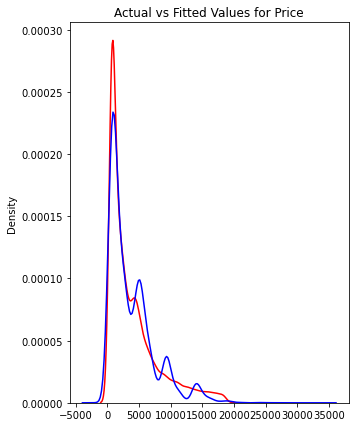

In [78]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

In [79]:
import plotly.graph_objs as go

### Decision Trees

In [80]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=10,criterion='mse')


In [81]:
print(RegModel)

DecisionTreeRegressor(criterion='mse', max_depth=10)


In [82]:
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

In [83]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

R2 Value: 0.9814200136622575



 Model Validation and Accuracy Calculations


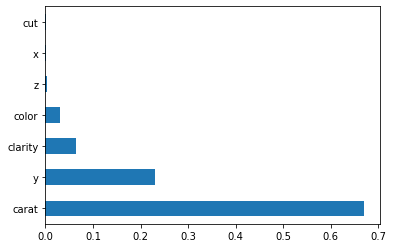

In [84]:
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
print('\n Model Validation and Accuracy Calculations')

In [85]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


In [86]:
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   price  Predictedprice
0   3353          3560.0
1   2930          2985.0
2   4155          4532.0
3   2780          2985.0
4    684           487.0


In [87]:
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 90.77400138244182
Median Accuracy on test data: 92.95774647887323


In [88]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

In [89]:
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
dtAccuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [61.45927451 69.61348617 78.84784973 75.8646412  75.41339837 16.77003452
 29.75636244 41.38598748 55.87339271 65.06785461]

Final Average Accuracy of the model: 57.01


### Plotting a Decision Tree

In [93]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Admin/miniconda3/Library/bin/graphviz'

In [94]:
# max_depth=10 is too large to plot here

# Load libraries
#from IPython.display import Image
#from sklearn import tree
#import pydotplus

# Create DOT data
#dot_data = tree.export_graphviz(RegModel, out_file=None, 
#feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in
# This graph with max_depth=10 is too large to plot!!

## AdaBoost

In [95]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [96]:
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.01)

In [97]:
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=100)


In [98]:
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

In [99]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

R2 Value: 0.984915779860944



 Model Validation and Accuracy Calculations


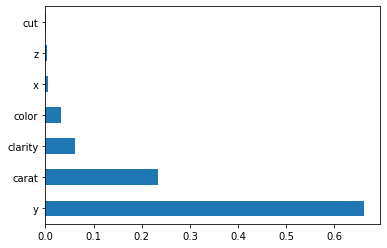

In [100]:
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n Model Validation and Accuracy Calculations')

In [101]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

In [102]:
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   price  Predictedprice
0   3353          3628.0
1   2930          2902.0
2   4155          4538.0
3   2780          2892.0
4    684           598.0


In [103]:
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 91.28595457749336
Median Accuracy on test data: 93.32129963898917


In [104]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

In [105]:
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)




In [107]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
abAccuracy_Values=Accuracy_Values.mean()
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [81.79861    85.63774221 84.80533366 81.73299603 78.32902303 81.06578256
 84.38723046 81.40557098 81.35072859 82.13806535]

Final Average Accuracy of the model: 82.27


### Plotting one of the Decision trees from Adaboost

In [108]:
# max_depth=10 is too large to plot here

# PLotting 5th single Decision Tree from Adaboost
# Load libraries
#from IPython.display import Image
#from sklearn import tree
#import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
#dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#Image(graph.create_png(), width=500,height=500)
# Use a smaller value of max_depth if you wish to plot it here!

## XGBoost

In [109]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

print(RegModel)

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)


In [110]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

[17:38:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

R2 Value: 0.9771150377043045



 Model Validation and Accuracy Calculations


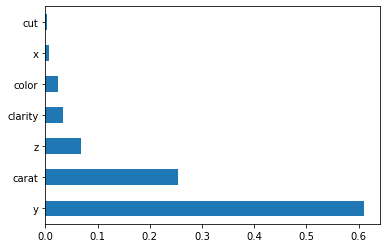

In [112]:
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
print('\n Model Validation and Accuracy Calculations')

In [113]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

In [114]:
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   price  Predictedprice
0   3353          3136.0
1   2930          3218.0
2   4155          5099.0
3   2780          3183.0
4    684           123.0


In [115]:
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 86.5981617012431
Median Accuracy on test data: 91.0989010989011


In [116]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [118]:
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
xgAccuracy_Values=Accuracy_Values.mean()
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[17:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:42:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:18

### Plotting a single Decision tree out of XGBoost

In [119]:
#!pip install graphviz

<AxesSubplot:>

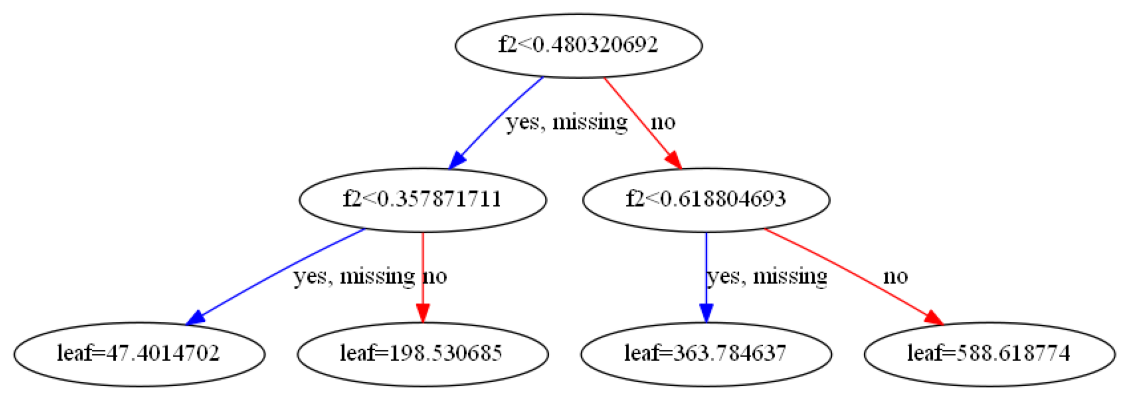

In [120]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=5, n_estimators=100,criterion='mse')

print(RegModel)

RandomForestRegressor(criterion='mse', max_depth=5)


In [122]:
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

In [123]:
from sklearn import metrics

print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))


R2 Value: 0.9448995676069205



 Model Validation and Accuracy Calculations 


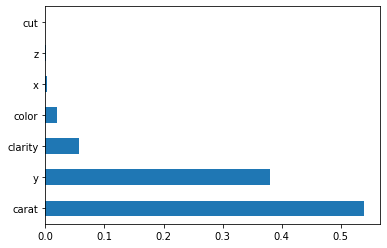

In [124]:
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n Model Validation and Accuracy Calculations ')

In [125]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

In [126]:
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

   price  Predictedprice
0   3353          3668.0
1   2930          3174.0
2   4155          4674.0
3   2780          3179.0
4    684           790.0


In [127]:
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 84.51268773280445
Median Accuracy on test data: 88.15247252747253


In [128]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [129]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
rfaccuracy_values=Accuracy_Values.mean()
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [73.47790127 82.33494057 80.15099618 73.38968411 77.7482741  79.20475483
 78.80242602 71.32108567 79.64199285 78.04848505]

Final Average Accuracy of the model: 77.41


## KNN

In [130]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4)

print(RegModel)

KNeighborsRegressor(n_neighbors=4)


In [131]:
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [132]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

R2 Value: 0.9854972757120172


In [133]:
print('\nModel Validation and Accuracy Calculations')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())


Model Validation and Accuracy Calculations
   price  Predictedprice
0   3353          3354.0
1   2930          2969.0
2   4155          4679.0
3   2780          2822.0
4    684           568.0


In [134]:
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 92.20705478564183
Median Accuracy on test data: 94.51737451737452


In [135]:
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [136]:
from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
knnaccuracy=Accuracy_Values.mean()
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.08090544 86.92400989 86.2269059  83.79794874 81.372233   82.44892063
 83.84355469 83.06151715 83.67478521 84.43899899]

Final Average Accuracy of the model: 83.99


### ACCURACY COMPARISION


In [142]:
import matplotlib.pyplot as plt
method = ['MLP','DT','XGB','ADB','SVM','RF','KNN']

In [143]:
accuracy = [57.01,81.64,83.69,82.29,87.72,77.43,83.99]

<BarContainer object of 7 artists>

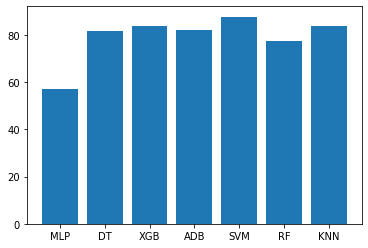

In [144]:
plt.bar(method,accuracy)

In [145]:
newcolours=["red","blue","green","orange","black","purple","grey"]

<BarContainer object of 7 artists>

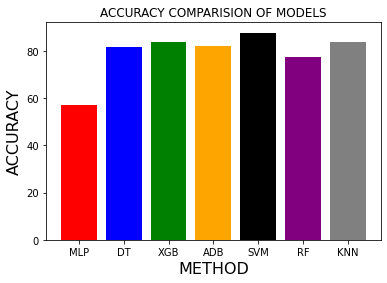

In [146]:
plt.title("ACCURACY COMPARISION OF MODELS")
plt.xlabel("METHOD",fontsize=16)
plt.ylabel("ACCURACY",fontsize=16)
plt.bar(method,accuracy,color=newcolours)